In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math
from scipy.stats import spearmanr #to compute spearman correlation
from scipy.stats import pearsonr #to compute pearson correlation
from scipy.stats import kendalltau #to compute kendall tau correlation

In [2]:
data_folder = './Data/' # all my data is in one folder 
path_sources_final='sources_final.csv'
path_control_grp='sources_1.csv'
path_df1='df_1.csv'
path_df2='df_2.csv'

In [3]:
#getting our necessary datasets
df_sources_final=pd.read_csv(data_folder + path_sources_final) #maps channel_id to extreme grp corresponding
df_1=pd.read_csv(data_folder + path_df1)
df_2=pd.read_csv(data_folder + path_df2)

In [4]:
#combining the two dataframes from the two folders 
#(should do it right from the begining? I was afraid it would slow things to have a dataframe so big)
df=pd.concat([df_1, df_2],ignore_index=True)

In [5]:
#extracting only necessary columns
df_sources=df_sources_final[["Category", "Id"]]
df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)

C:\Users\HOURS\AppData\Local\Temp\ipykernel_12060\2487438044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)


In [6]:
df_sources.head()

,Category,channel_id
0,Alt-lite,UCfDdlNLRVb1h3_7Xh-WhL3w
1,Alt-lite,UCso6oQ3qy7z61Fr8b0WNBMw
2,Alt-lite,UCplXdu0g94UynzYCmO2zOjw
3,Alt-lite,UCl3RCEtooHD5bhPCHJw3btA
4,Alt-lite,UCbukZErY9SjdGTHabMzY7qg


In [7]:
#checking for NaN values
print("there are", len(df_sources[df_sources.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [8]:
df.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g


In [9]:
#checking for NaN values
print("there are", len(df[df.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [11]:
#we have more channels in df than in df_sources but the difference is small

In [12]:
df_final=df.merge(df_sources, how='left', on='channel_id')

In [13]:
df_final

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id,Category
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518458,150459,798,56069.0,20170127,0.327090,0.013587,0.205679,0.050272,0.182447,0.001762,0.053731,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite
518459,150460,799,154838.0,20161018,0.209794,0.007211,0.134747,0.027038,0.094364,0.010686,0.024407,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite
518460,150461,800,30093.0,20180326,0.237014,0.004566,0.083292,0.062911,0.147315,0.001810,0.019613,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite
518461,150462,801,93406.0,20171219,0.309945,0.009368,0.155549,0.086939,0.165149,0.011248,0.023771,UC0aVoboXBUx2-tVIWHc3W2Q,Alt-lite


In [14]:
#overwriting the category for the channels belonging to the control group
df_control_=pd.read_csv(data_folder + path_control_grp) #maps channel_id to extreme grp corresponding

In [15]:
#list of channels belonging to control grp
list_control_=(df_control_[df_control_["Data Collection step"]=='control'].Id).tolist()

In [16]:
df_final.loc[df_final["channel_id"].isin(list_control_), "Category"] = 'control'

In [17]:
#checking for NaN values
nb_Nan=len(df_final[df_final.isnull().any(axis=1)])
print("there are", nb_Nan, "Nan values which corresponds to", nb_Nan*100/len(df_final), "% of the dataframe")

there are 1998 Nan values which corresponds to 0.3853698335271755 % of the dataframe


In [18]:
#very little Nan values, we won't be using channels where the category is Nan (unknown)

In [19]:
#Notice None means "not associated to anything" and not "Nan" 
df_final.Category.value_counts()

control                  332815
Alt-lite                  63667
Intellectual Dark Web     34252
PUA                       27508
MGTOW                     19932
NONE                      14793
Alt-right                 14208
MRA                        5613
Incel                      3468
PUA                         209
Name: Category, dtype: int64

In [20]:
#MGTOW men going their own way, anti feminist misogynistic politic group

#MRA men's rights activist (again anti feminist)

#Incel a member of an online community of young men who consider themselves unable to attract women sexually, 
#typically associated with views that are hostile towards women and men who are sexually active:

#Pick up : online community sharing tips on how to pick up women

### Let's start our analysis

Now that we have our dataframe and all the values we want we can start our analysis. 
We're keeping only Alt-lite, Alt-right, Intellectual Dark Web channels and control channels. 

In [21]:
#several questions, should I divide into many sub-dataFrames? Not? Should definitely plot boxplot to compare them. 
#Check distribution also with histogram? 

In [22]:
#getting some basic information 
df_extreme=df_final.loc[df_final['Category'].isin(['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control'])]

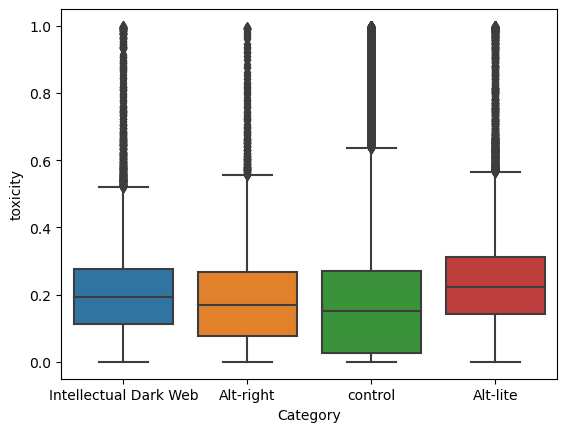

In [23]:
ax = sns.boxplot(x="Category", y="toxicity", data=df_final.loc[df_final['Category'].isin(['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control'])])

Text(0, 0.6, 'Nb channels')

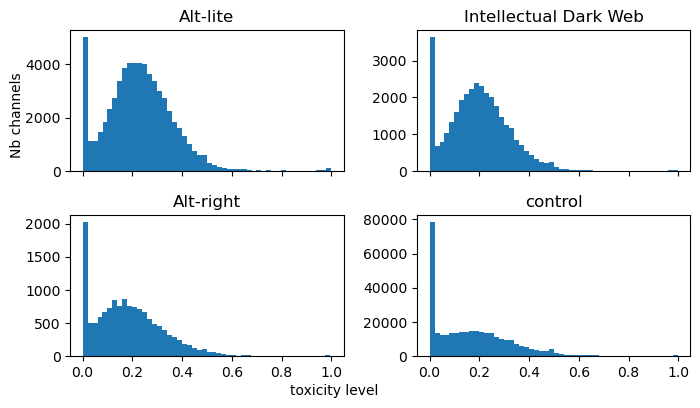

In [24]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = True) #chose sharey=False as we are interested 
#the distribution, not the exact values
list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_category[i]]
    sbplt.hist(df['toxicity'].values, bins = 50)
    sbplt.set_title(list_category[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "Nb channels", rotation = 90)

**Discussion:** We see they all have a peak at 0 (the first bin), all are left skewed they all seem to have their peak (other than the one at 0) around 0.2.

Nice that means that although they are extreme groups, the model detoxify doesn't recognize the comments being made as toxic

## Are toxicity scores and popularity correlated?

Recall that we define the popularity of a video/channel by its number of views. 

In [25]:
#we will do it among extreme groups, else we would need to normalize??? Maybe that would've been best? 

Text(0, 0.6, 'view_count')

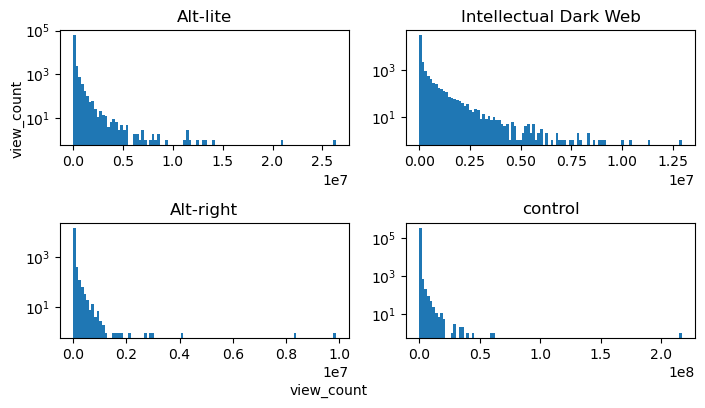

In [101]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = False) #chose sharey=False and sharex=False 
#as we are interested the distribution, not the exact values
list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log')
    df=df_extreme.loc[df_extreme['Category']==list_category[i]]
    sbplt.hist(df['view_count'].values, bins = 100)
    sbplt.set_title(list_category[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count")
fig.text(0,0.6, "view_count", rotation = 90)

We notice that the distribution is left skewed, we'll have to take that in account when computing 

Text(0, 0.6, 'toxicity level')

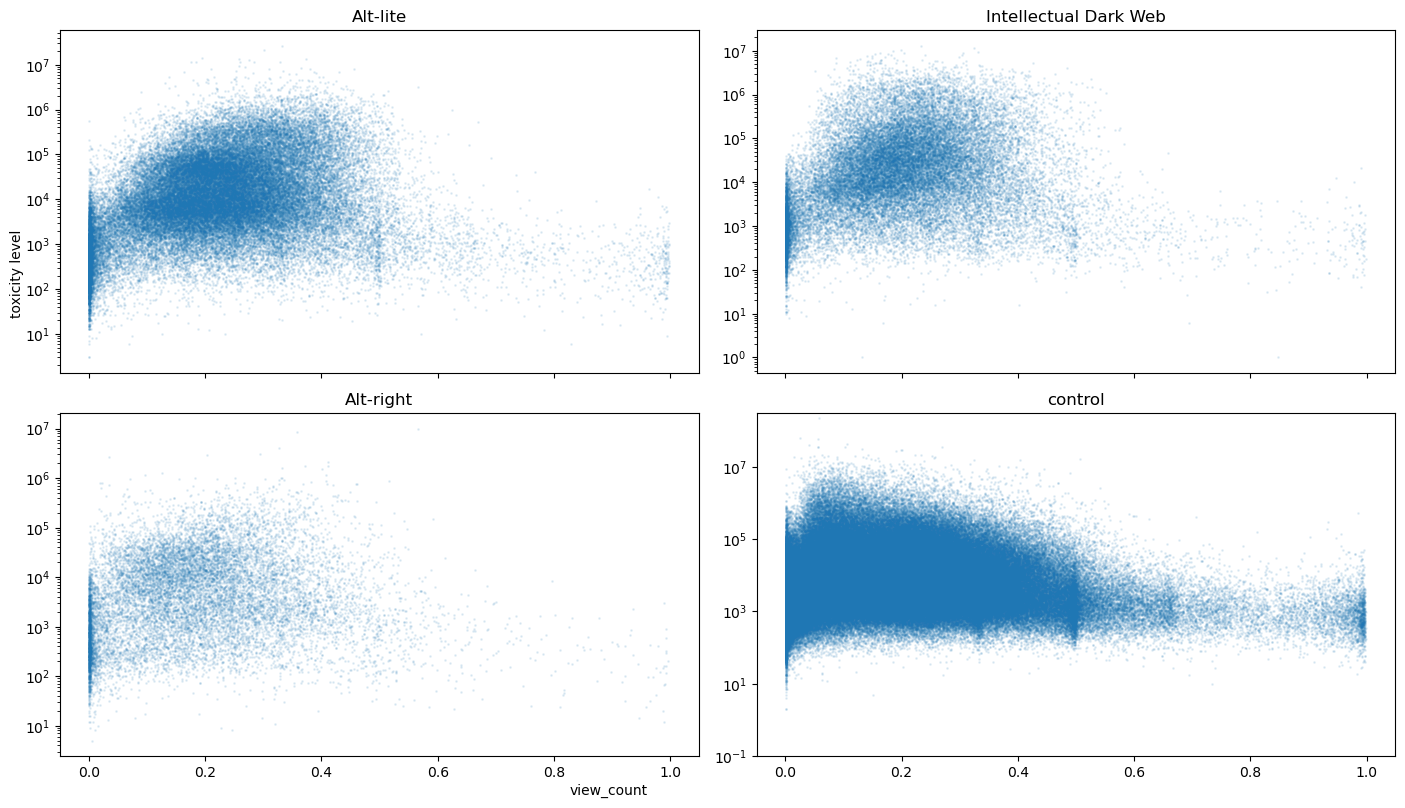

In [125]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
#the distribution, not the exact values

list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log') #plot the y axis in logarithm 
    df=df_extreme.loc[df_extreme['Category']==list_category[i]]
    if i==3:
        epsilon=10**(-1)
        ax[i%2, math.floor(i/2)].set_ylim([epsilon,3*10**8])
    sbplt.scatter(df['toxicity'], df['view_count'], s = 1, alpha=0.1)
    sbplt.set_title(list_category[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count")
fig.text(0,0.6, "toxicity level", rotation = 90)

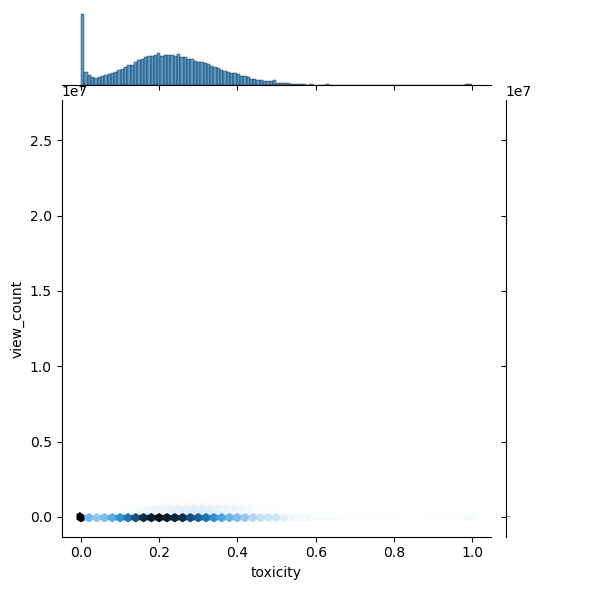

In [27]:
#37 seconds
df=df_extreme.loc[df_extreme['Category']==list_category[0]]
sns.jointplot(x=df['toxicity'], y=df['view_count'], kind="hex")

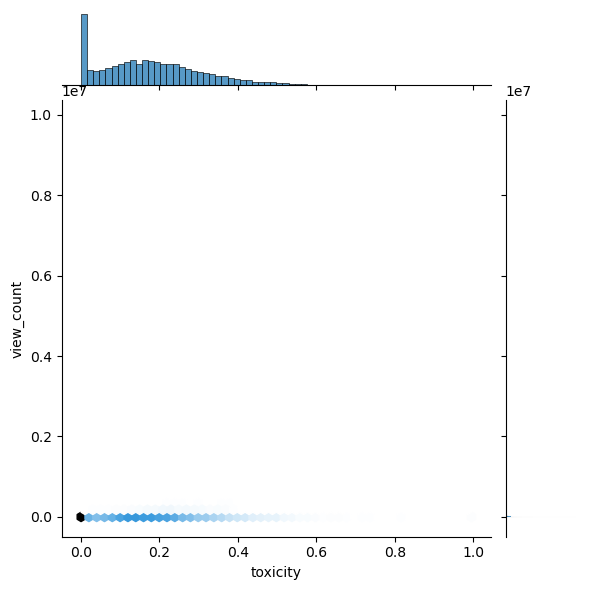

In [28]:
#30 seconds
df=df_extreme.loc[df_extreme['Category']==list_category[1]]
sns.jointplot(x=df['toxicity'], y=df['view_count'], kind="hex")

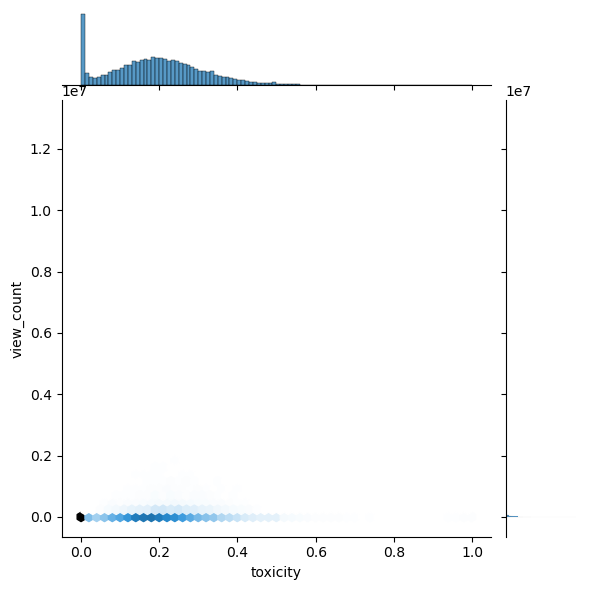

In [29]:
#30 seconds
df=df_extreme.loc[df_extreme['Category']==list_category[2]]
sns.jointplot(x=df['toxicity'], y=df['view_count'], kind="hex")

In [30]:
#takes several minutes to run, makes sense as control is the largest category didn't go all the way
df=df_extreme.loc[df_extreme['Category']==list_category[3]]
sns.jointplot(x=df['toxicity'], y=df['view_count'], kind="hex")

Error in callback <function flush_figures at 0x0000028528F1B280> (for post_execute):


KeyboardInterrupt: 

In [39]:
#Spearman's correlation, how well can the data be approcimated by a monotonic function
#Pearson's correlation, how well can the data be approximated by a linear function
#Kendall Tau'correlation, how well can the data be approximated in terms of "coherant pairs" (ex: a lot of data in the top right 
#a lot in the bottom left, and none elsewhere)

list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in list_category:
    df=df_extreme.loc[df_extreme['Category']==i]
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['view_count'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['view_count'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['view_count'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

Alt-lite
spearman correlation coefficient is equal to 0.285 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.101 with an associated p-value of 0.0
kendall tau correlation coefficient is equal to 0.203 with an associated p-value of 0.0
Alt-right
spearman correlation coefficient is equal to 0.204 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.068 with an associated p-value of 0.0
kendall tau correlation coefficient is equal to 0.138 with an associated p-value of 0.0
Intellectual Dark Web
spearman correlation coefficient is equal to 0.272 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.077 with an associated p-value of 0.0
kendall tau correlation coefficient is equal to 0.194 with an associated p-value of 0.0
control
spearman correlation coefficient is equal to 0.173 with an associated p-value of 0.0
pearson correlation coefficient is equal to -0.008 with an associated p-value of 0.0
kendall ta

### Only the top 25
view_count has a very skewed distribution, so the correlation that we get might be biased by the fact most videos have view_count 0. Therefore, we're studying the toxicity of the 25 most popular videos per community

Text(0, 0.6, 'view_count')

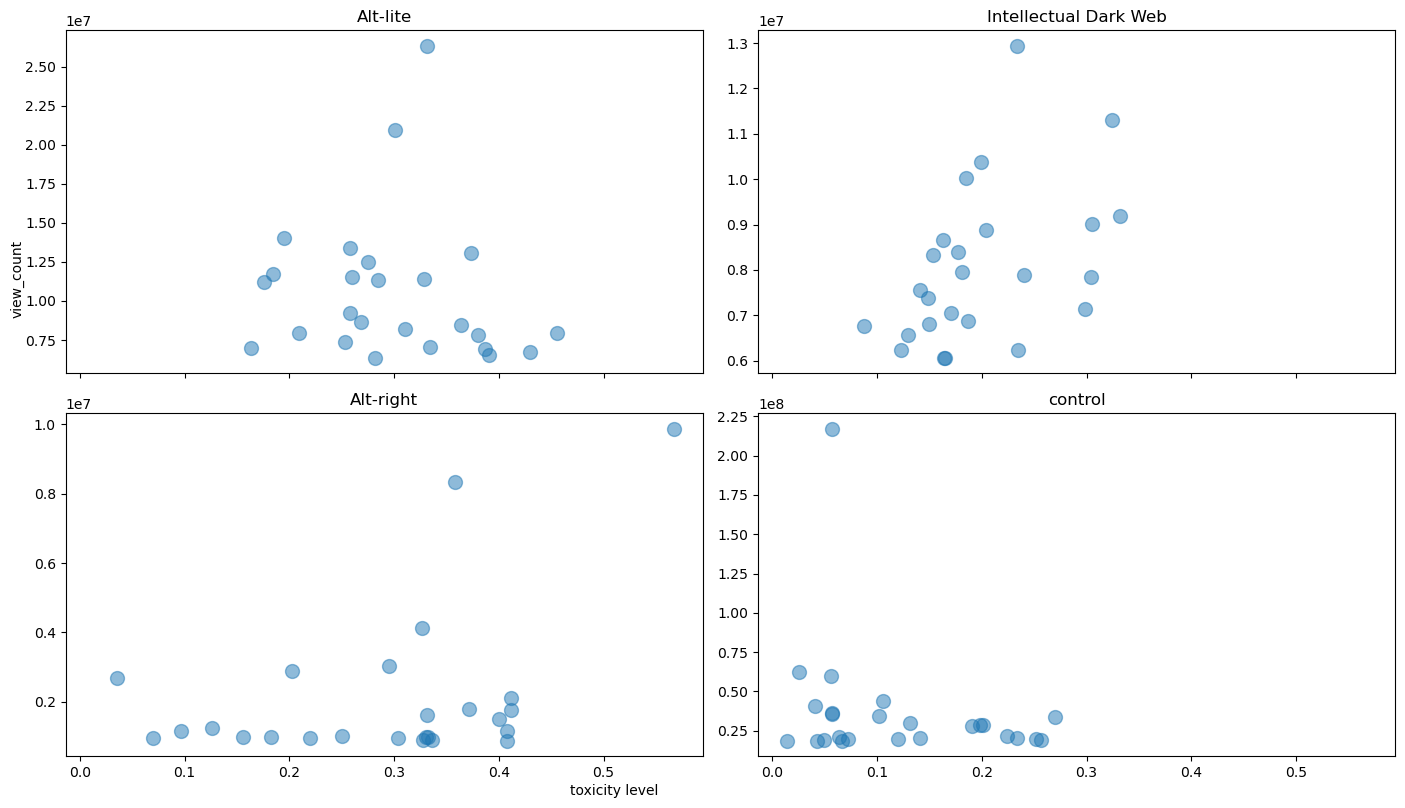

In [75]:
#checking correlation and scatter plot only for top 25 videos per category

#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
#the distribution, not the exact values

list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_category[i]]
    df=df.sort_values('view_count', ascending=False).head(25)
    sbplt.scatter(df['toxicity'], df['view_count'], s = 100, alpha=0.5)
    sbplt.set_title(list_category[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "view_count", rotation = 90)

In [76]:
list_category=['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'control']

for i in list_category:
    df=df_extreme.loc[df_extreme['Category']==i]
    df=df.sort_values('view_count', ascending=False).head(25)
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['view_count'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['view_count'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['view_count'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

Alt-lite
spearman correlation coefficient is equal to -0.291 with an associated p-value of 0.159
pearson correlation coefficient is equal to -0.124 with an associated p-value of 0.556
kendall tau correlation coefficient is equal to -0.193 with an associated p-value of 0.185
Alt-right
spearman correlation coefficient is equal to 0.201 with an associated p-value of 0.336
pearson correlation coefficient is equal to 0.403 with an associated p-value of 0.046
kendall tau correlation coefficient is equal to 0.14 with an associated p-value of 0.342
Intellectual Dark Web
spearman correlation coefficient is equal to 0.548 with an associated p-value of 0.005
pearson correlation coefficient is equal to 0.458 with an associated p-value of 0.021
kendall tau correlation coefficient is equal to 0.4 with an associated p-value of 0.005
control
spearman correlation coefficient is equal to -0.152 with an associated p-value of 0.47
pearson correlation coefficient is equal to -0.244 with an associated p-val

Although there is a correlation the toxicity value rarely exceeds 0.5 especially when you compare to the control group it's not obvious 

## With channels instead of videos ! 

In [ ]:
#extracting channel_id and community it belongs to 
